In [1]:
import jsonpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("results_50_2021-04-26.json", "r") as file:
    contents = file.read()
    unfrozen = jsonpickle.decode(contents)

df = pd.DataFrame(unfrozen)
cols = list(df.columns)

## Group items
Group items by depth (= how many steps were required to finish the puzzle), show the distribution of depths as chart

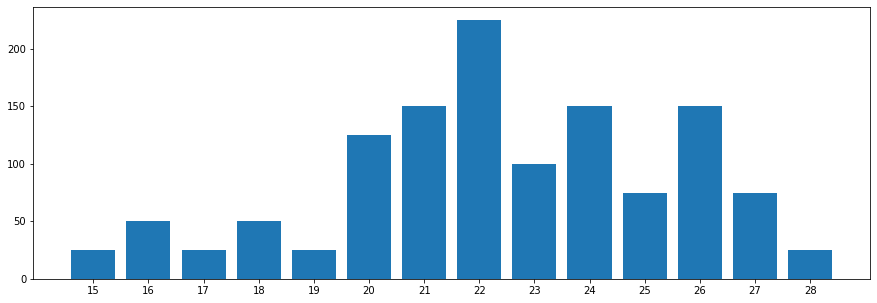

In [3]:
group = df.groupby(['depth'])
x_pos = [i for i, _ in enumerate(group)]
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(list(group.groups.keys()))
ax.bar(list(group.groups.keys()), list(group.size()))
plt.show()

## Printing a single constellation

In [48]:
x1 = df.groupby('array')



# x1 = np.array(df[0:25]['weights'].tolist())[:,0]
# y = df[0:25]['expanded_nodes']
# fig, ax = plt.subplots(1,2, figsize=(15,5))
# ax[1].plot(x1,y, "b--", label="Manhattan weight")
# ax[1].set_xlabel("weight ratio")
# ax[1].set_ylabel("expanded nodes")
# ax[1].legend()

# x2 = np.array(df[0:25]['weights'].tolist())[:,1]
# y = df[0:25]['expanded_nodes']
# ax[0].plot(x2,y, "r--", label="Hamming weight")
# ax[0].set_xlabel("weight ratio")
# ax[0].set_ylabel("expanded nodes")
# ax[0].legend()

# plt.show()

# ############## COMBINED

# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot()
# ax2 = ax1.twiny()

# ax1.plot(x1,y, "b", label="Manhattan weight")
# ax1.set_xlabel("Manhattan weight")
# ax1.set_ylabel("expanded nodes")
# ax1.legend()

# ax2.plot(x2,y, "r--", label="Hamming weight")
# ax2.set_xlabel("Hamming weight")
# ax2.set_ylabel("expanded nodes")
# ax2.legend()

# plt.show()


## Print constellation for all (average)

Shows the average expanded nodes based on the weight

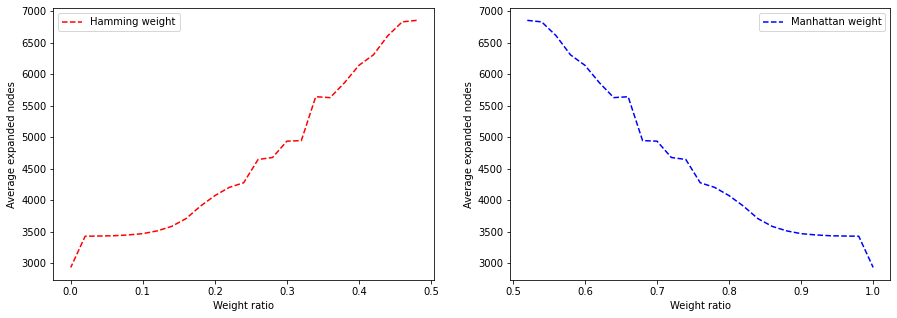

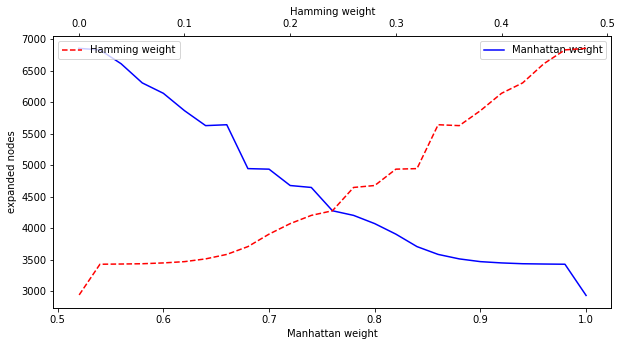

In [5]:
weight_group = df.groupby(['weights'])
x1 = np.array(list(weight_group.groups.keys()))[:,0]
x2 = np.array(list(weight_group.groups.keys()))[:,1]
y = weight_group['expanded_nodes'].mean()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(x1, y, "b--", label="Manhattan weight") 
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average expanded nodes")
ax[1].legend()

ax[0].plot(x2, y, "r--",label = "Hamming weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()
plt.show()

###################### COMBINED

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twiny()

ax1.plot(x1,y, "b", label="Manhattan weight")
ax1.set_xlabel("Manhattan weight")
ax1.set_ylabel("expanded nodes")
ax1.legend()

ax2.plot(x2,y, "r--", label="Hamming weight")
ax2.set_xlabel("Hamming weight")
ax2.set_ylabel("expanded nodes")
ax2.legend()

plt.show()


In [6]:
df = pd.DataFrame(unfrozen)

## Min Nodes

In [7]:
min_value = group[['expanded_nodes']].min()
min_value

,expanded_nodes
depth,
15,218
16,230
17,448
18,304
19,638
20,260
21,777
22,478
23,1282


## Max Nodes

In [8]:
min_value = group[['expanded_nodes']].max()
min_value

,expanded_nodes
depth,
15,297
16,509
17,559
18,918
19,1174
20,1554
21,3816
22,4732
23,4786


## Mean Nodes

In [9]:
mean_value = group[['expanded_nodes']].mean()
print(mean_value)

       expanded_nodes
depth                
15         249.480000
16         356.580000
17         473.960000
18         565.300000
19         918.720000
20        1095.720000
21        2214.613333
22        2381.342222
23        2806.390000
24        5891.913333
25        8888.226667
26        9276.093333
27       14110.600000
28       17946.880000


## Best weights based on the least nodes per depth

In [10]:
min_nodes = df.loc[group['expanded_nodes'].idxmin()]
np.mean(min_nodes['weights'].tolist(), axis=0)

array([0.93, 0.07])

## Best weights based on the weights with the least nodes of each example

In [11]:
group_by_example = df.groupby('array')
min_nodes_per_example = df.loc[group_by_example['expanded_nodes'].idxmin()]
np.mean(min_nodes_per_example['weights'].tolist(), axis=0)

array([0.9656, 0.0344])

In [12]:
min_nodes_per_example.sort_values("depth")

,array,weights,expanded_nodes,time_elapsed,depth
680,"(3, 6, 1, 0, 8, 2, 7, 4, 5)","(0.7399999999999998, 0.26)",218,0.028000,15
416,"(0, 2, 5, 4, 1, 8, 7, 6, 3)","(0.8399999999999999, 0.16)",230,0.029002,16
15,"(4, 6, 1, 3, 0, 8, 7, 5, 2)","(1.0, 0.0)",384,0.046000,16
309,"(4, 0, 7, 1, 3, 5, 6, 8, 2)","(0.8799999999999999, 0.12)",448,0.062999,17
97,"(4, 6, 1, 8, 7, 2, 0, 3, 5)","(0.98, 0.02)",711,0.106999,18
501,"(5, 4, 7, 1, 8, 2, 3, 6, 0)","(0.7999999999999998, 0.2)",304,0.050998,18
35,"(1, 0, 6, 4, 5, 8, 3, 2, 7)","(1.0, 0.0)",638,0.091998,19
723,"(1, 4, 6, 2, 5, 8, 3, 7, 0)","(0.7199999999999998, 0.28)",1067,0.175998,20
3,"(8, 1, 0, 2, 5, 3, 6, 4, 7)","(1.0, 0.0)",751,0.110000,20
45,"(0, 6, 4, 2, 3, 8, 7, 5, 1)","(1.0, 0.0)",761,0.119000,20


[0.72 0.74 0.8  0.84 0.88 0.9  0.92 0.96 0.98 1.  ]
weights
(0.7199999999999998, 0.28)     53.350000
(0.7399999999999998, 0.26)     14.533333
(0.7999999999999998, 0.2)      16.888889
(0.8399999999999999, 0.16)     25.806818
(0.8799999999999999, 0.12)     26.352941
(0.8999999999999999, 0.1)      82.965368
(0.9199999999999999, 0.08)     55.739130
(0.96, 0.04)                  104.130435
(0.98, 0.02)                  112.464591
(1.0, 0.0)                    141.964983
Name: normalized_expanded_nodes, dtype: float64


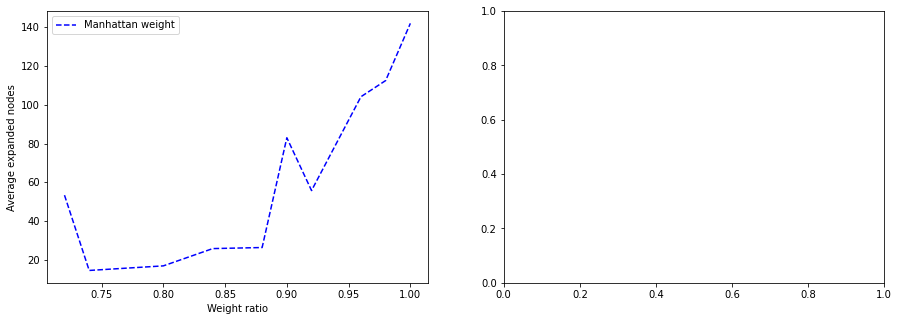

In [13]:
min_nodes_per_example['normalized_expanded_nodes'] = min_nodes_per_example['expanded_nodes'] / min_nodes_per_example['depth']
weight_group = min_nodes_per_example.groupby(['weights'])

x1 = np.array(list(weight_group.groups.keys()))[:,0]
x2 = np.array(list(weight_group.groups.keys()))[:,1]
weight_group['normalized_expanded_nodes']
y = weight_group['normalized_expanded_nodes'].mean()

print(x1)
print(y)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x1, y, "b--", label="Manhattan weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()

# ax[1].plot(x2, y, "r--",label = "Hamming weight") 
# ax[1].set_xlabel("Weight ratio")
# ax[1].set_ylabel("Average expanded nodes")
# ax[1].legend()
plt.show()

# ###################### COMBINED

# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot()
# ax2 = ax1.twiny()

# ax1.plot(x1,y, "b", label="Manhattan weight")
# ax1.set_xlabel("Manhattan weight")
# ax1.set_ylabel("expanded nodes")
# ax1.legend()

# ax2.plot(x2,y, "r--", label="Hamming weight")
# ax2.set_xlabel("Hamming weight")
# ax2.set_ylabel("expanded nodes")
# ax2.legend()

# plt.show()
